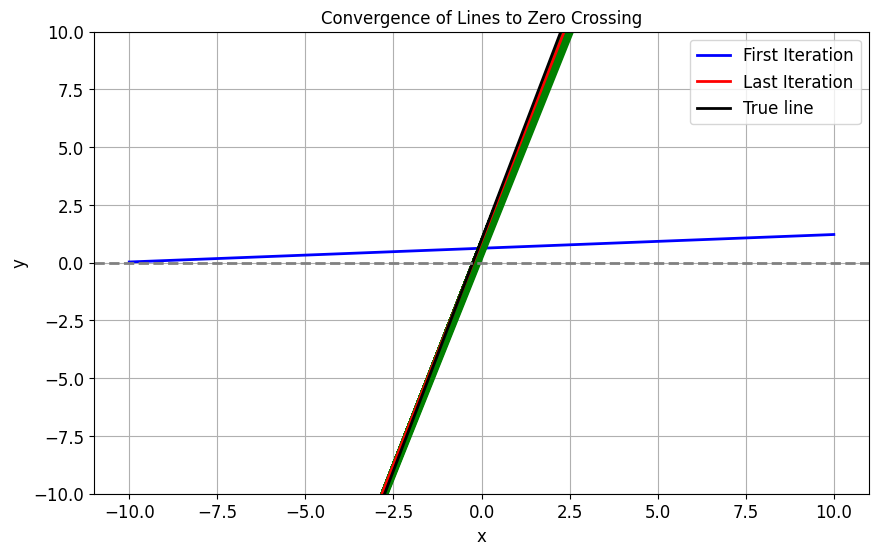

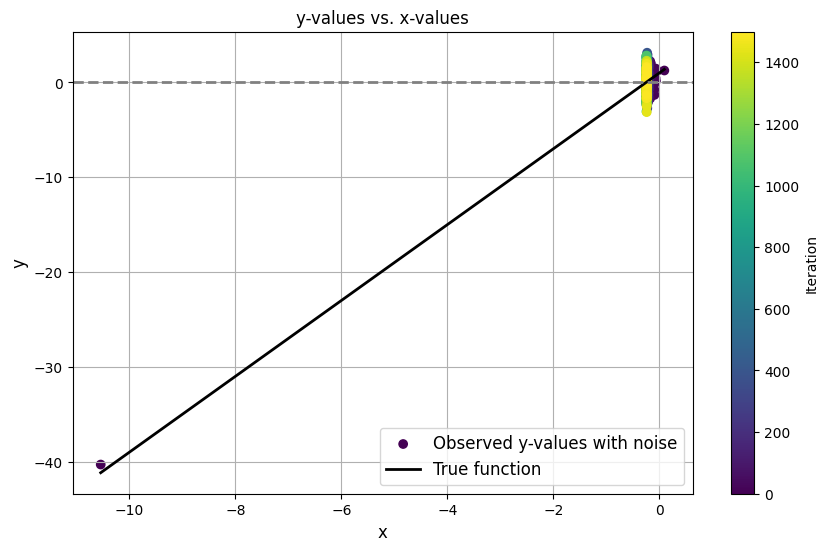

Final estimated parameters: [0.92613586 3.8692347 ]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

def define_prior(mu_array, sigma_matrix):
    """ Define the initial prior mean and covariance matrix. """
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    """ Compute the mean and variance of Y based on alpha parameters and x. """
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    """ Compute the posterior distribution parameters. """
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    """ Simulate Y using the alpha parameters, x values, and random noise. """
    return np.dot(alpha, x) + epsilon

def infer_x(alpha):
    """ Infer the zero crossing from alpha parameters. Handles division by zero. """
    return -alpha[0] / alpha[1] if alpha[1] != 0 else None

def plot_line(alpha, iteration, x_range, color='green', label='Iteration', fontsize=12):
    """ Plot the line based on alpha values with given color. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = alpha[0] + alpha[1] * x_values
    plt.plot(x_values, y_values, color=color, linewidth=2, label=label)
    plt.xlabel('x', fontsize=fontsize)
    plt.ylabel('y', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(f'Iteration {iteration}', fontsize=fontsize)

def plot_true_line(true_alpha, x_range, fontsize=12):
    """ Plot the true line using true alpha values. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = true_alpha[0] + true_alpha[1] * x_values
    plt.plot(x_values, y_values, color='black', linewidth=2, label='True line')
    plt.xlabel('x', fontsize=fontsize)
    plt.ylabel('y', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

def main():
    true_alpha = np.array([1, 4])  # True alpha values
    prior_mu, prior_sigma = define_prior([0, 0], [[1, 0], [0, 1]])
    num_iterations = 1500
    x_0 = np.random.normal(0, 1)  # Initial random x_0
    fontsize = 12  # Set the font size

    # Prepare to collect x and y values for plotting
    x_values = []
    y_values = []
    plt.figure(figsize=(10, 6))

    for i in range(num_iterations):
        epsilon = np.random.normal(loc=0, scale=1)
        y = simulate_y(true_alpha, np.array([1, x_0]), epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, np.array([1, x_0]))
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, np.array([1, x_0]))

        # Store x and y values for plotting
        x_values.append(x_0)
        y_values.append(y)

        # Determine color based on iteration
        if i == 0:
            color = 'blue'  # First iteration
            label = 'First Iteration'
        elif i == num_iterations - 1:
            color = 'red'  # Last iteration
            label = 'Last Iteration'
        else:
            color = 'green'  # Intermediate iterations
            label = 'Intermediate Iteration'

        plot_line(updated_alpha_mu, i, [-10, 10], color=color, label=label if i in [0, num_iterations - 1] else '_nolegend_', fontsize=fontsize)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma  # Update prior with posterior

        # Convergence check
        x_0 = infer_x(updated_alpha_mu)
        #if abs(y) < 0.0001:
        #    break

    plot_true_line(true_alpha, [-10, 10], fontsize=fontsize)  # Plot the true line
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("Convergence of Lines to Zero Crossing", fontsize=fontsize)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    plt.ylim([-10, 10])  # Set y-axis limits
    plt.grid(True)
    plt.legend(fontsize=fontsize)  # Add legend
    plt.show()

    # Plot the y-values vs. x-values with a color gradient
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x_values, y_values, c=np.arange(len(x_values)), cmap='viridis', label='Observed y-values with noise')
    plt.colorbar(scatter, label='Iteration')
    x_line = np.linspace(min(x_values), max(x_values), 400)
    y_line = true_alpha[0] + true_alpha[1] * x_line
    plt.plot(x_line, y_line, color='black', linewidth=2, label='True function')
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("y-values vs. x-values", fontsize=fontsize)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    #plt.ylim([-20, 20])
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.show()

    print("Final estimated parameters:", prior_mu)

if __name__ == "__main__":
    main()


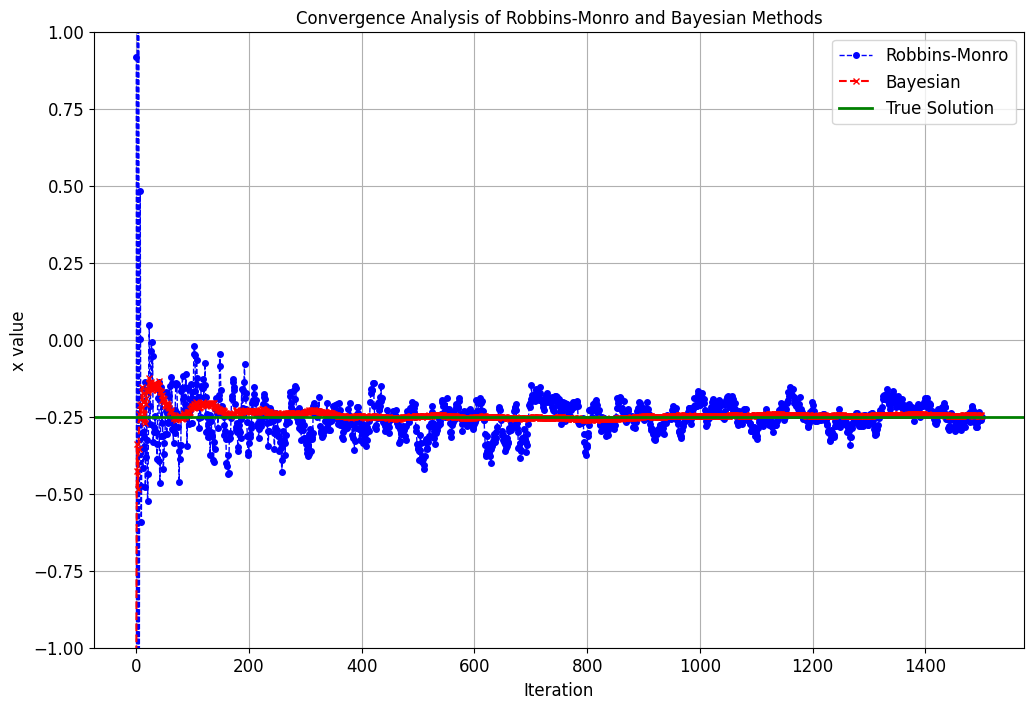

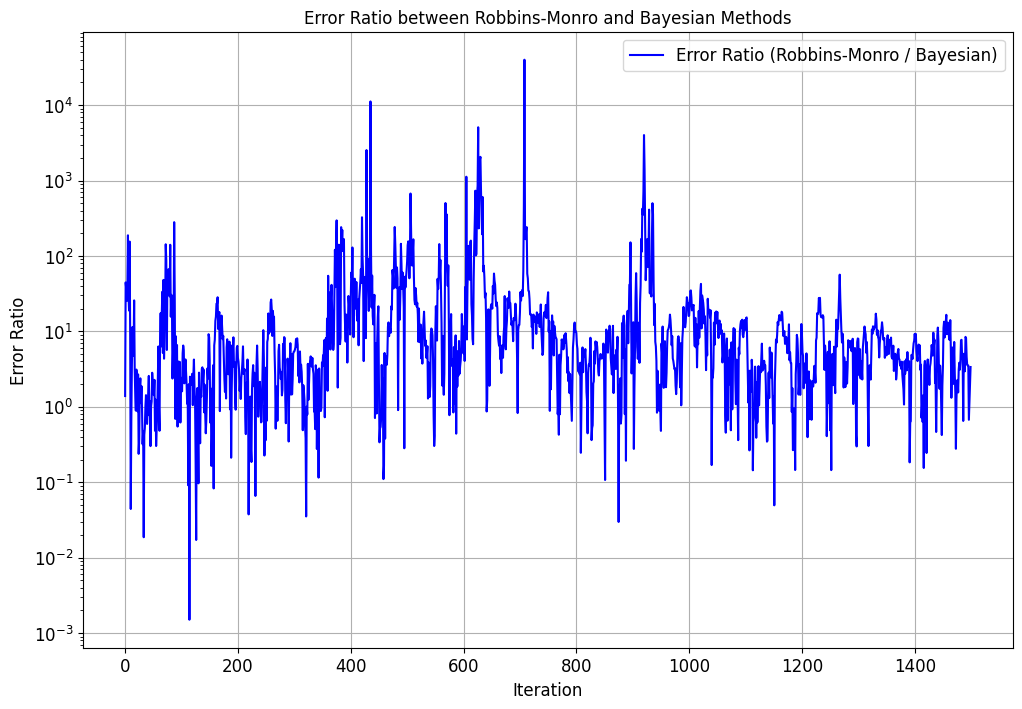

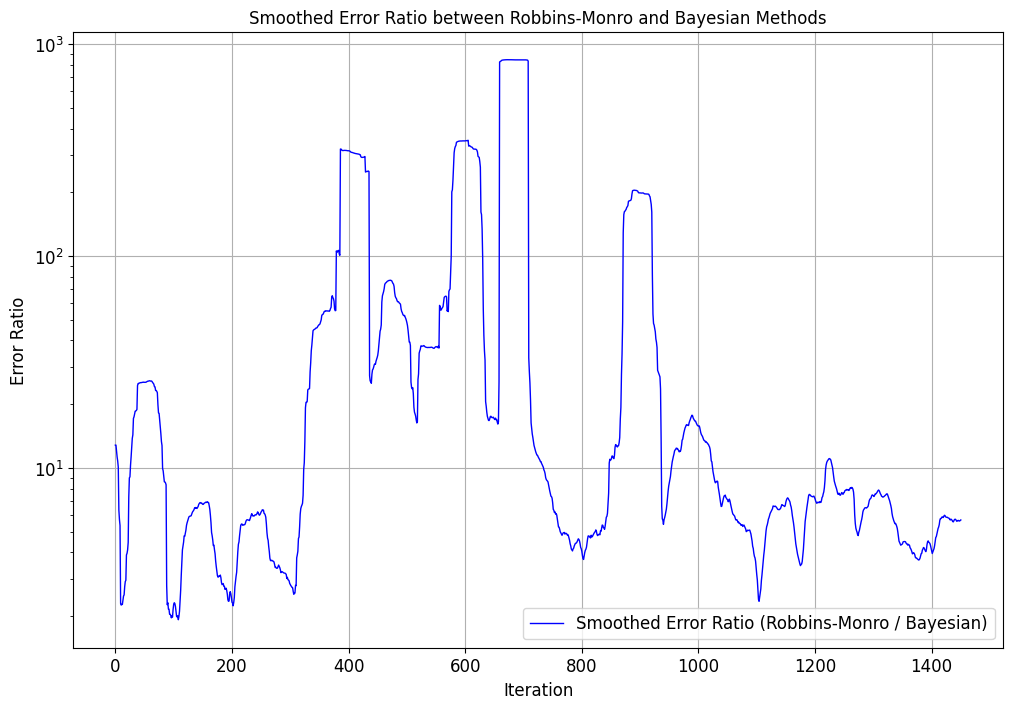

Final estimate from Robbins-Monro method: -0.26208560068166314
Final estimate from Bayesian method: -0.24641467320493682


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition for both methods
def f(x):
    return 1 + 4 * x

# Robbins-Monro implementation
def robbins_monro(initial_guess, steps, a_n):
    x = initial_guess
    x_values = [x]
    for n in range(steps):
        noise = np.random.normal(0,1)
        x = x - a_n(n) * (f(x) + noise)
        x_values.append(x)
    return x_values

def step_size(n):
    return 1 / (1 + n)**0.6

# Bayesian method functions
def define_prior(mu_array, sigma_matrix):
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1  # Variance, not standard deviation
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    return np.dot(alpha, x) + epsilon

def F(x):
    return np.array([x, 1])  # Feature vector for linear function

def g(x, alpha):
    return np.dot(F(x), alpha)

def find_zero_crossing(func, alpha, x_range=(-10, 10), tol=1e-5, max_iterations=100):
    x = np.random.uniform(x_range[0], x_range[1])  # Initial guess
    for _ in range(max_iterations):
        fx = g(x, alpha)
        fpx = alpha[0]  # Derivative of g(x, alpha) for linear function
        if abs(fx) < tol:
            return x
        if fpx == 0:
            x = np.random.uniform(x_range[0], x_range[1])  # Avoid division by zero
        else:
            x = x - fx / fpx
    return None

def moving_average(data, window_size):
    """ Calculate the moving average over a specific window size """
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')    

# Main function to perform convergence analysis
def main():
    fontsize = 12  # Set the font size
    true_alpha = np.array([4, 1])
    prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))  # Identity matrix for initial prior
    num_iterations = 1500  # For both methods
    x_range = (-10, 10)

    # Robbins-Monro method
    initial_guess_rm = np.random.uniform(0,1)
    x_values_rm = robbins_monro(initial_guess_rm, num_iterations, step_size)

    # Bayesian method
    x_values_bayesian = []
    x = initial_guess_rm
    for i in range(num_iterations):
        x_vector = F(x)
        epsilon = np.random.normal(0, 1)
        y = simulate_y(true_alpha, x_vector, epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, x_vector)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

        x_zero = find_zero_crossing(g, updated_alpha_mu)
        if x_zero is not None:
            x = x_zero
        x_values_bayesian.append(x)

    # True solution for comparison
    true_solution = -0.25  # Based on the function definition 1 + 4x = 0 => x = -0.25

    # Plotting convergence
    plt.figure(figsize=(12, 8))

    plt.plot(x_values_rm, label="Robbins-Monro", marker='o', linestyle='--', color='blue', markersize=4, lw=1)
    plt.plot(x_values_bayesian, label="Bayesian", marker='x', linestyle='--', color='red', markersize=4)
    plt.axhline(true_solution, color='green', linestyle='-', linewidth=2, label='True Solution')

    plt.xlabel("Iteration", fontsize=fontsize)
    plt.ylabel("x value", fontsize=fontsize)
    plt.title("Convergence Analysis of Robbins-Monro and Bayesian Methods", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylim([-1, 1])  # Zooming in on the relevant region
    plt.show()

    # Ensuring both methods have the same length of iterations
    min_length = min(len(x_values_rm), len(x_values_bayesian))
    x_values_rm = x_values_rm[:min_length]
    x_values_bayesian = x_values_bayesian[:min_length]

    # Calculating the ratio of the error terms
    ratios = [abs(x - true_solution) / abs(y - true_solution) for x, y in zip(x_values_rm, x_values_bayesian)]

    # Plotting the ratio
    plt.figure(figsize=(12, 8))
    plt.plot(ratios, label='Error Ratio (Robbins-Monro / Bayesian)', color='blue')
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.yscale('log')  # Using log scale for better visualization
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Apply moving average to the error ratios
    window_size = 50
    smoothed_ratios = moving_average(ratios, window_size)

    # Plotting the smoothed error ratio
    plt.figure(figsize=(12, 8))
    plt.plot(smoothed_ratios, label='Smoothed Error Ratio (Robbins-Monro / Bayesian)', color='blue', linewidth=1)
    plt.yscale('log')    
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Smoothed Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Print the final estimates from both methods
    final_estimate_rm = x_values_rm[-1]
    final_estimate_bayesian = x_values_bayesian[-1]
    print(f"Final estimate from Robbins-Monro method: {final_estimate_rm}")
    print(f"Final estimate from Bayesian method: {final_estimate_bayesian}")

if __name__ == "__main__":
    main()


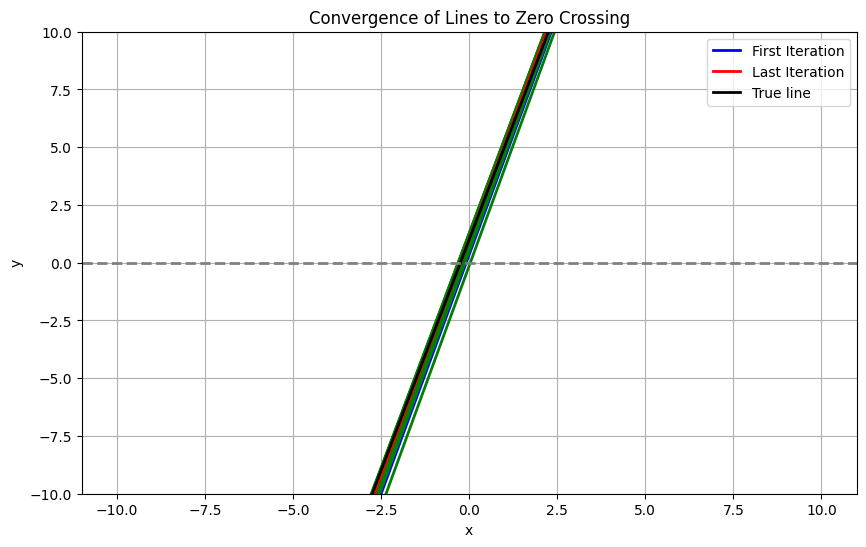

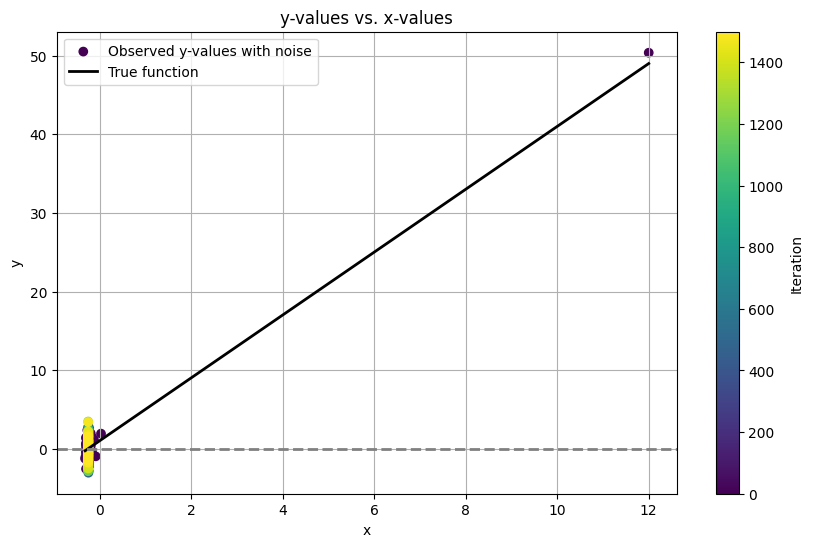

Final estimated parameters: [1.01053166 4.08685281]


In [11]:
##initial point at x_0 = 12

import numpy as np
import matplotlib.pyplot as plt
import time

def define_prior(mu_array, sigma_matrix):
    """ Define the initial prior mean and covariance matrix. """
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    """ Compute the mean and variance of Y based on alpha parameters and x. """
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    """ Compute the posterior distribution parameters. """
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    """ Simulate Y using the alpha parameters, x values, and random noise. """
    return np.dot(alpha, x) + epsilon

def infer_x(alpha):
    """ Infer the zero crossing from alpha parameters. Handles division by zero. """
    return -alpha[0] / alpha[1] if alpha[1] != 0 else None

def plot_line(alpha, iteration, x_range, color='green', label='Iteration'):
    """ Plot the line based on alpha values with given color. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = alpha[0] + alpha[1] * x_values
    plt.plot(x_values, y_values, color=color, linewidth=2, label=label)

def plot_true_line(true_alpha, x_range):
    """ Plot the true line using true alpha values. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = true_alpha[0] + true_alpha[1] * x_values
    plt.plot(x_values, y_values, color='black', linewidth=2, label='True line')

def main():
    true_alpha = np.array([1, 4])  # True alpha values
    prior_mu, prior_sigma = define_prior([0, 0], [[1, 0], [0, 1]])
    num_iterations = 1500
    #x_0 = np.random.normal(0, 1)  # Initial random x_0
    x_0  = 12
    # Prepare to collect x and y values for plotting
    x_values = []
    y_values = []
    plt.figure(figsize=(10, 6))

    for i in range(num_iterations):
        epsilon = np.random.normal(loc=0, scale=1)
        y = simulate_y(true_alpha, np.array([1, x_0]), epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, np.array([1, x_0]))
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, np.array([1, x_0]))

        # Store x and y values for plotting
        x_values.append(x_0)
        y_values.append(y)

        # Determine color based on iteration
        if i == 0:
            color = 'blue'  # First iteration
            label = 'First Iteration'
        elif i == num_iterations - 1:
            color = 'red'  # Last iteration
            label = 'Last Iteration'
        else:
            color = 'green'  # Intermediate iterations
            label = 'Intermediate Iteration'

        plot_line(updated_alpha_mu, i, [-10, 10], color=color, label=label if i in [0, num_iterations - 1] else '_nolegend_')

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma  # Update prior with posterior

        # Convergence check
        x_0 = infer_x(updated_alpha_mu)
        #if abs(y) < 0.0001:
        #    break

    plot_true_line(true_alpha, [-10, 10])  # Plot the true line
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("Convergence of Lines to Zero Crossing")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-10, 10])  # Set y-axis limits
    plt.grid(True)
    plt.legend()  # Add legend
    plt.show()

    # Plot the y-values vs. x-values with a color gradient
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x_values, y_values, c=np.arange(len(x_values)), cmap='viridis', label='Observed y-values with noise')
    plt.colorbar(scatter, label='Iteration')
    x_line = np.linspace(min(x_values), max(x_values), 400)
    y_line = true_alpha[0] + true_alpha[1] * x_line
    plt.plot(x_line, y_line, color='black', linewidth=2, label='True function')
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("y-values vs. x-values")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Final estimated parameters:", prior_mu)

if __name__ == "__main__":
    main()


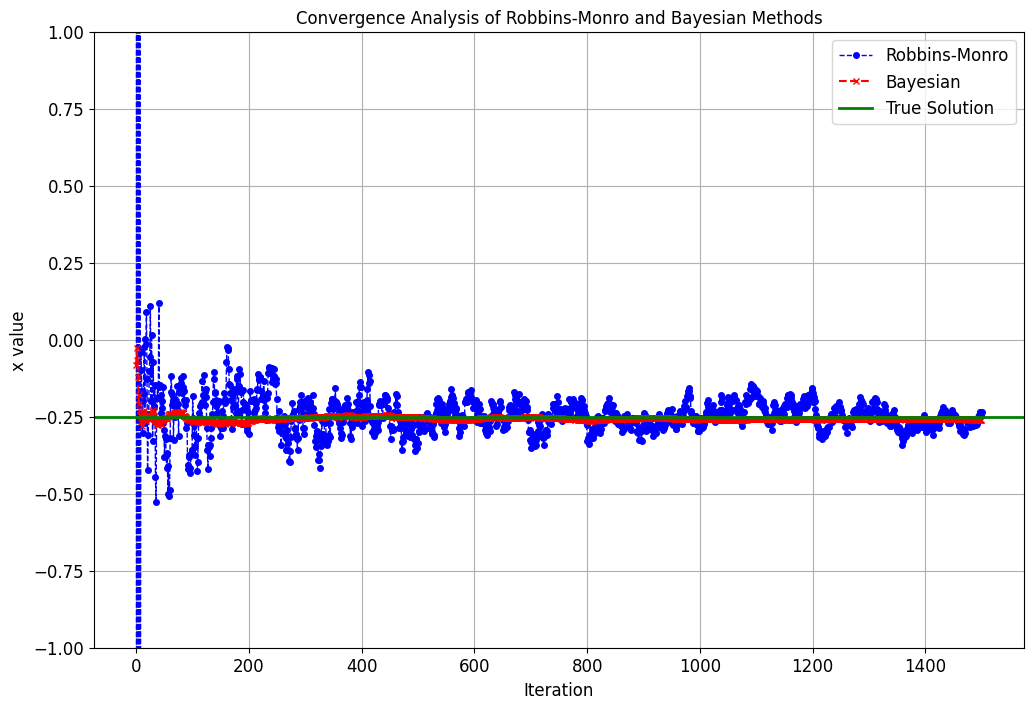

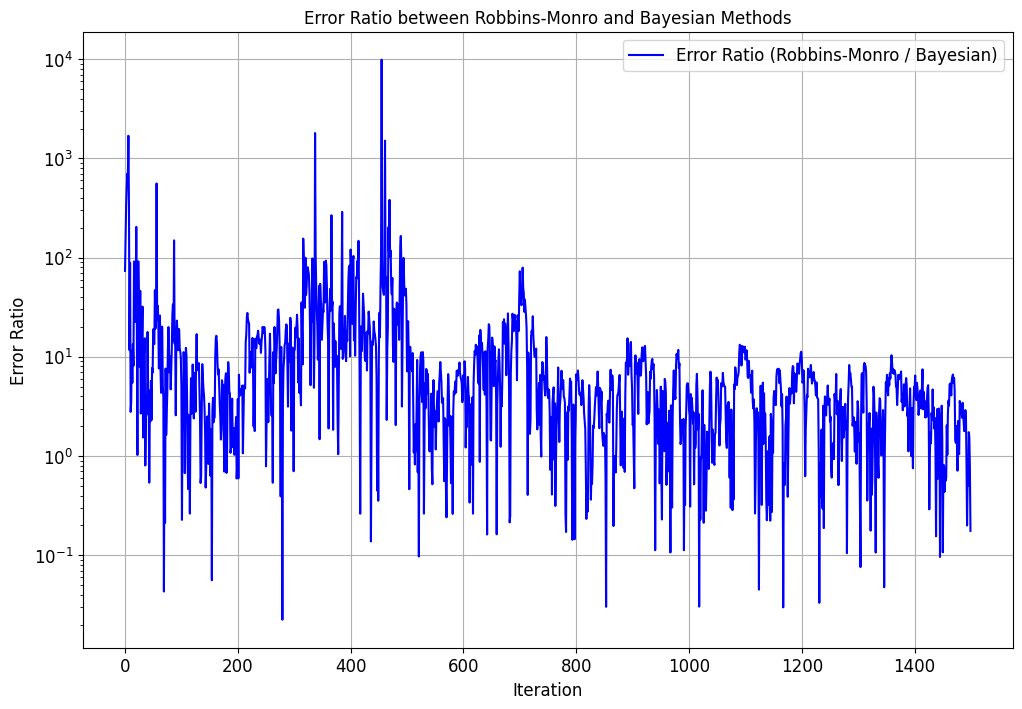

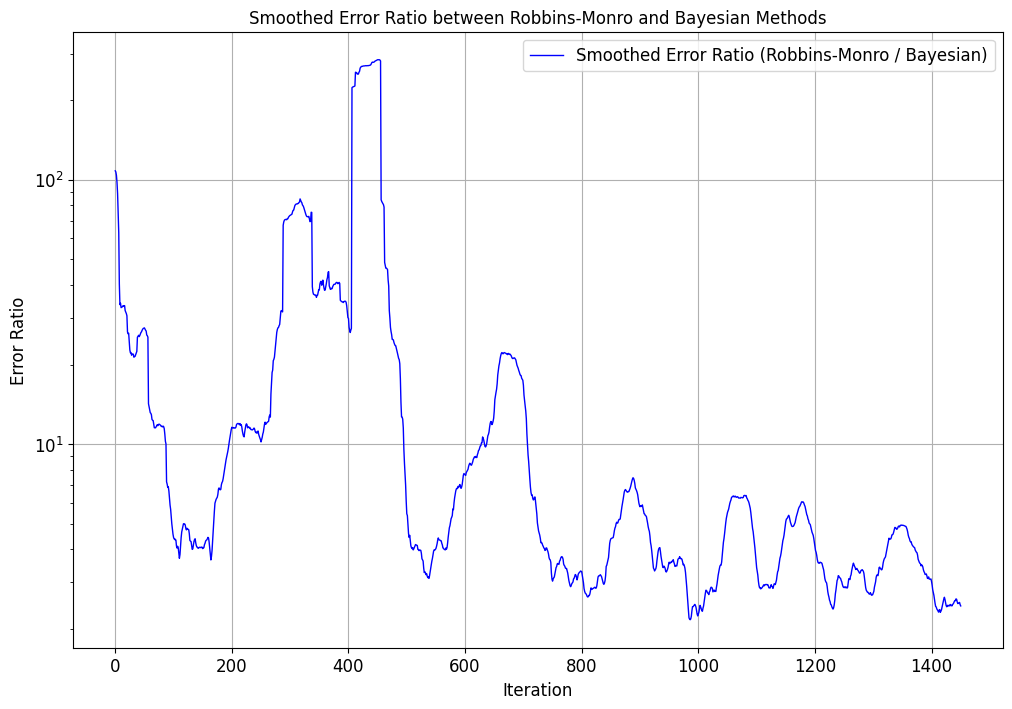

Final estimate from Robbins-Monro method: -0.248410467039594
Final estimate from Bayesian method: -0.25902971591390234


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition for both methods
def f(x):
    return 1 + 4 * x

# Robbins-Monro implementation
def robbins_monro(initial_guess, steps, a_n):
    x = initial_guess
    x_values = [x]
    for n in range(steps):
        noise = np.random.normal(0,1)
        x = x - a_n(n) * (f(x) + noise)
        x_values.append(x)
    return x_values

def step_size(n):
    return 1 / (1 + n)**0.6

# Bayesian method functions
def define_prior(mu_array, sigma_matrix):
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1  # Variance, not standard deviation
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    return np.dot(alpha, x) + epsilon

def F(x):
    return np.array([x, 1])  # Feature vector for linear function

def g(x, alpha):
    return np.dot(F(x), alpha)

def find_zero_crossing(func, alpha, x_range=(-10, 10), tol=1e-5, max_iterations=100):
    x = np.random.uniform(x_range[0], x_range[1])  # Initial guess
    for _ in range(max_iterations):
        fx = g(x, alpha)
        fpx = alpha[0]  # Derivative of g(x, alpha) for linear function
        if abs(fx) < tol:
            return x
        if fpx == 0:
            x = np.random.uniform(x_range[0], x_range[1])  # Avoid division by zero
        else:
            x = x - fx / fpx
    return None

def moving_average(data, window_size):
    """ Calculate the moving average over a specific window size """
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')    

# Main function to perform convergence analysis
def main():
    fontsize = 12  # Set the font size
    true_alpha = np.array([4, 1])
    prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))  # Identity matrix for initial prior
    num_iterations = 1500  # For both methods
    x_range = (-10, 10)

    # Robbins-Monro method
    initial_guess_rm = 12
    x_values_rm = robbins_monro(initial_guess_rm, num_iterations, step_size)

    # Bayesian method
    x_values_bayesian = []
    x = initial_guess_rm
    for i in range(num_iterations):
        x_vector = F(x)
        epsilon = np.random.normal(0, 1)
        y = simulate_y(true_alpha, x_vector, epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, x_vector)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

        x_zero = find_zero_crossing(g, updated_alpha_mu)
        if x_zero is not None:
            x = x_zero
        x_values_bayesian.append(x)

    # True solution for comparison
    true_solution = -0.25  # Based on the function definition 1 + 4x = 0 => x = -0.25

    # Plotting convergence
    plt.figure(figsize=(12, 8))

    plt.plot(x_values_rm, label="Robbins-Monro", marker='o', linestyle='--', color='blue', markersize=4, lw=1)
    plt.plot(x_values_bayesian, label="Bayesian", marker='x', linestyle='--', color='red', markersize=4)
    plt.axhline(true_solution, color='green', linestyle='-', linewidth=2, label='True Solution')

    plt.xlabel("Iteration", fontsize=fontsize)
    plt.ylabel("x value", fontsize=fontsize)
    plt.title("Convergence Analysis of Robbins-Monro and Bayesian Methods", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylim([-1, 1])  # Zooming in on the relevant region
    plt.show()

    # Ensuring both methods have the same length of iterations
    min_length = min(len(x_values_rm), len(x_values_bayesian))
    x_values_rm = x_values_rm[:min_length]
    x_values_bayesian = x_values_bayesian[:min_length]

    # Calculating the ratio of the error terms
    ratios = [abs(x - true_solution) / abs(y - true_solution) for x, y in zip(x_values_rm, x_values_bayesian)]

    # Plotting the ratio
    plt.figure(figsize=(12, 8))
    plt.plot(ratios, label='Error Ratio (Robbins-Monro / Bayesian)', color='blue')
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.yscale('log')  # Using log scale for better visualization
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Apply moving average to the error ratios
    window_size = 50
    smoothed_ratios = moving_average(ratios, window_size)

    # Plotting the smoothed error ratio
    plt.figure(figsize=(12, 8))
    plt.plot(smoothed_ratios, label='Smoothed Error Ratio (Robbins-Monro / Bayesian)', color='blue', linewidth=1)
    plt.yscale('log')    
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Smoothed Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Print the final estimates from both methods
    final_estimate_rm = x_values_rm[-1]
    final_estimate_bayesian = x_values_bayesian[-1]
    print(f"Final estimate from Robbins-Monro method: {final_estimate_rm}")
    print(f"Final estimate from Bayesian method: {final_estimate_bayesian}")

if __name__ == "__main__":
    main()


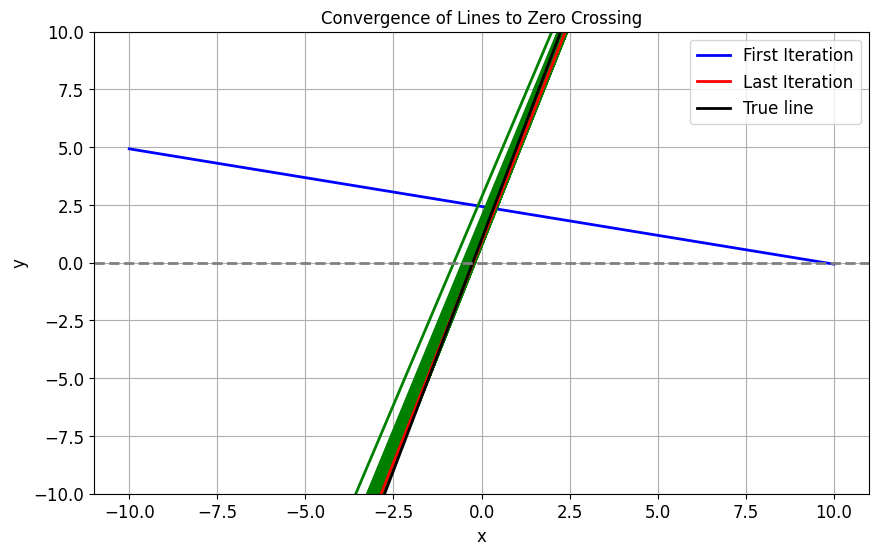

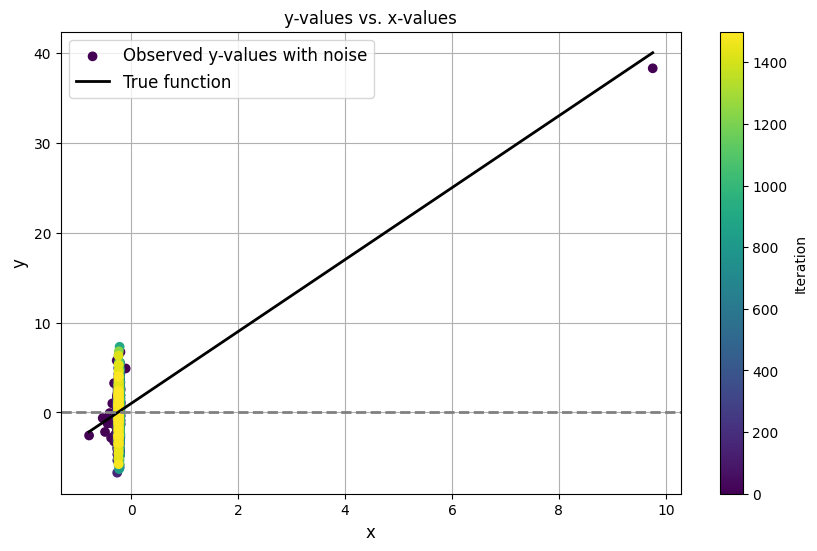

Final estimated parameters: [0.89988895 3.82541811]


In [19]:

##Higher noise - N(0,2)

import numpy as np
import matplotlib.pyplot as plt
import time

def define_prior(mu_array, sigma_matrix):
    """ Define the initial prior mean and covariance matrix. """
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    """ Compute the mean and variance of Y based on alpha parameters and x. """
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    """ Compute the posterior distribution parameters. """
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    """ Simulate Y using the alpha parameters, x values, and random noise. """
    return np.dot(alpha, x) + epsilon

def infer_x(alpha):
    """ Infer the zero crossing from alpha parameters. Handles division by zero. """
    return -alpha[0] / alpha[1] if alpha[1] != 0 else None

def plot_line(alpha, iteration, x_range, color='green', label='Iteration', fontsize=12):
    """ Plot the line based on alpha values with given color. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = alpha[0] + alpha[1] * x_values
    plt.plot(x_values, y_values, color=color, linewidth=2, label=label)
    plt.xlabel('x', fontsize=fontsize)
    plt.ylabel('y', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(f'Iteration {iteration}', fontsize=fontsize)

def plot_true_line(true_alpha, x_range, fontsize=12):
    """ Plot the true line using true alpha values. """
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y_values = true_alpha[0] + true_alpha[1] * x_values
    plt.plot(x_values, y_values, color='black', linewidth=2, label='True line')
    plt.xlabel('x', fontsize=fontsize)
    plt.ylabel('y', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

def main():
    true_alpha = np.array([1, 4])  # True alpha values
    prior_mu, prior_sigma = define_prior([0, 0], [[1, 0], [0, 1]])
    num_iterations = 1500
    x_0 = np.random.normal(0, 1)  # Initial random x_0
    fontsize = 12  # Set the font size

    # Prepare to collect x and y values for plotting
    x_values = []
    y_values = []
    plt.figure(figsize=(10, 6))

    for i in range(num_iterations):
        epsilon = np.random.normal(loc=0, scale=2)
        y = simulate_y(true_alpha, np.array([1, x_0]), epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, np.array([1, x_0]))
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, np.array([1, x_0]))

        # Store x and y values for plotting
        x_values.append(x_0)
        y_values.append(y)

        # Determine color based on iteration
        if i == 0:
            color = 'blue'  # First iteration
            label = 'First Iteration'
        elif i == num_iterations - 1:
            color = 'red'  # Last iteration
            label = 'Last Iteration'
        else:
            color = 'green'  # Intermediate iterations
            label = 'Intermediate Iteration'

        plot_line(updated_alpha_mu, i, [-10, 10], color=color, label=label if i in [0, num_iterations - 1] else '_nolegend_', fontsize=fontsize)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma  # Update prior with posterior

        # Convergence check
        x_0 = infer_x(updated_alpha_mu)
        #if abs(y) < 0.0001:
        #    break

    plot_true_line(true_alpha, [-10, 10], fontsize=fontsize)  # Plot the true line
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("Convergence of Lines to Zero Crossing", fontsize=fontsize)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    plt.ylim([-10, 10])  # Set y-axis limits
    plt.grid(True)
    plt.legend(fontsize=fontsize)  # Add legend
    plt.show()

    # Plot the y-values vs. x-values with a color gradient
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(x_values, y_values, c=np.arange(len(x_values)), cmap='viridis', label='Observed y-values with noise')
    plt.colorbar(scatter, label='Iteration')
    x_line = np.linspace(min(x_values), max(x_values), 400)
    y_line = true_alpha[0] + true_alpha[1] * x_line
    plt.plot(x_line, y_line, color='black', linewidth=2, label='True function')
    plt.axhline(y=0, color='grey', linestyle='--', linewidth=2)  # Add y=0 line
    plt.title("y-values vs. x-values", fontsize=fontsize)
    plt.xlabel("x", fontsize=fontsize)
    plt.ylabel("y", fontsize=fontsize)
    #plt.ylim([-20, 20])
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.show()

    print("Final estimated parameters:", prior_mu)

if __name__ == "__main__":
    main()


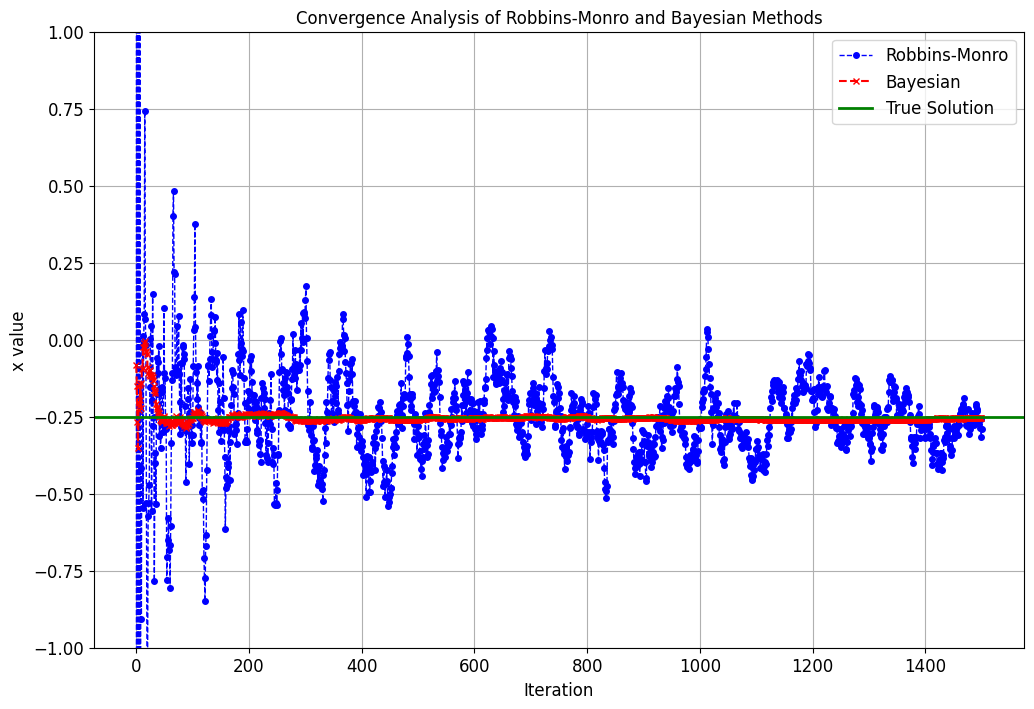

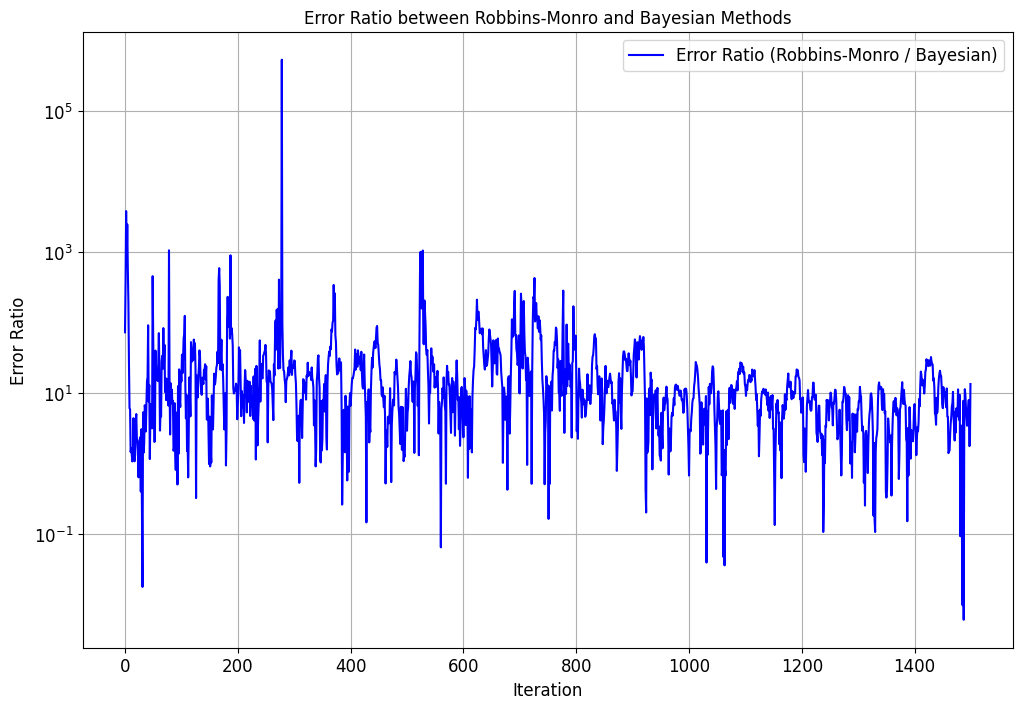

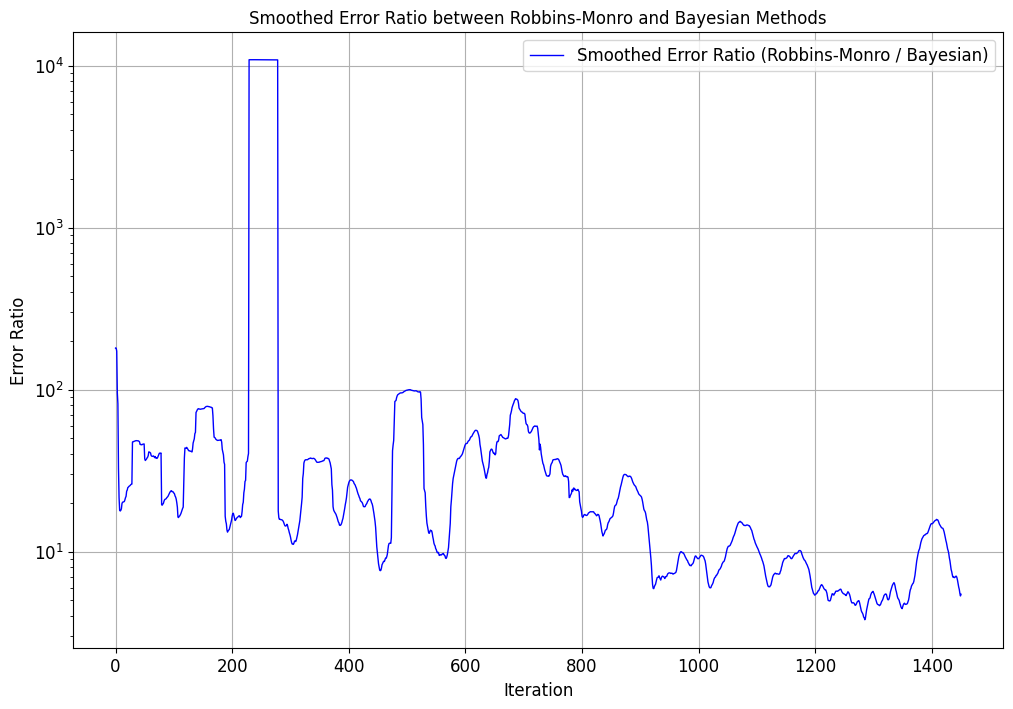

Final estimate from Robbins-Monro method: -0.31455002386795056
Final estimate from Bayesian method: -0.2547633404035814


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition for both methods
def f(x):
    return 1 + 4 * x

# Robbins-Monro implementation
def robbins_monro(initial_guess, steps, a_n):
    x = initial_guess
    x_values = [x]
    for n in range(steps):
        noise = np.random.normal(0,2)
        x = x - a_n(n) * (f(x) + noise)
        x_values.append(x)
    return x_values

def step_size(n):
    return 1 / (1 + n)**0.6

# Bayesian method functions
def define_prior(mu_array, sigma_matrix):
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1  # Variance, not standard deviation
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    return np.dot(alpha, x) + epsilon

def F(x):
    return np.array([x, 1])  # Feature vector for linear function

def g(x, alpha):
    return np.dot(F(x), alpha)

def find_zero_crossing(func, alpha, x_range=(-10, 10), tol=1e-5, max_iterations=100):
    x = np.random.uniform(x_range[0], x_range[1])  # Initial guess
    for _ in range(max_iterations):
        fx = g(x, alpha)
        fpx = alpha[0]  # Derivative of g(x, alpha) for linear function
        if abs(fx) < tol:
            return x
        if fpx == 0:
            x = np.random.uniform(x_range[0], x_range[1])  # Avoid division by zero
        else:
            x = x - fx / fpx
    return None

def moving_average(data, window_size):
    """ Calculate the moving average over a specific window size """
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')    

# Main function to perform convergence analysis
def main():
    fontsize = 12  # Set the font size
    true_alpha = np.array([4, 1])
    prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))  # Identity matrix for initial prior
    num_iterations = 1500  # For both methods
    x_range = (-10, 10)

    # Robbins-Monro method
    initial_guess_rm = 12
    x_values_rm = robbins_monro(initial_guess_rm, num_iterations, step_size)

    # Bayesian method
    x_values_bayesian = []
    x = initial_guess_rm
    for i in range(num_iterations):
        x_vector = F(x)
        epsilon = np.random.normal(0, 2)
        y = simulate_y(true_alpha, x_vector, epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, x_vector)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

        x_zero = find_zero_crossing(g, updated_alpha_mu)
        if x_zero is not None:
            x = x_zero
        x_values_bayesian.append(x)

    # True solution for comparison
    true_solution = -0.25  # Based on the function definition 1 + 4x = 0 => x = -0.25

    # Plotting convergence
    plt.figure(figsize=(12, 8))

    plt.plot(x_values_rm, label="Robbins-Monro", marker='o', linestyle='--', color='blue', markersize=4, lw=1)
    plt.plot(x_values_bayesian, label="Bayesian", marker='x', linestyle='--', color='red', markersize=4)
    plt.axhline(true_solution, color='green', linestyle='-', linewidth=2, label='True Solution')

    plt.xlabel("Iteration", fontsize=fontsize)
    plt.ylabel("x value", fontsize=fontsize)
    plt.title("Convergence Analysis of Robbins-Monro and Bayesian Methods", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylim([-1, 1])  # Zooming in on the relevant region
    plt.show()

    # Ensuring both methods have the same length of iterations
    min_length = min(len(x_values_rm), len(x_values_bayesian))
    x_values_rm = x_values_rm[:min_length]
    x_values_bayesian = x_values_bayesian[:min_length]

    # Calculating the ratio of the error terms
    ratios = [abs(x - true_solution) / abs(y - true_solution) for x, y in zip(x_values_rm, x_values_bayesian)]

    # Plotting the ratio
    plt.figure(figsize=(12, 8))
    plt.plot(ratios, label='Error Ratio (Robbins-Monro / Bayesian)', color='blue')
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.yscale('log')  # Using log scale for better visualization
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Apply moving average to the error ratios
    window_size = 50
    smoothed_ratios = moving_average(ratios, window_size)

    # Plotting the smoothed error ratio
    plt.figure(figsize=(12, 8))
    plt.plot(smoothed_ratios, label='Smoothed Error Ratio (Robbins-Monro / Bayesian)', color='blue', linewidth=1)
    plt.yscale('log')    
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Smoothed Error Ratio between Robbins-Monro and Bayesian Methods', fontsize=fontsize)
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Print the final estimates from both methods
    final_estimate_rm = x_values_rm[-1]
    final_estimate_bayesian = x_values_bayesian[-1]
    print(f"Final estimate from Robbins-Monro method: {final_estimate_rm}")
    print(f"Final estimate from Bayesian method: {final_estimate_bayesian}")

if __name__ == "__main__":
    main()


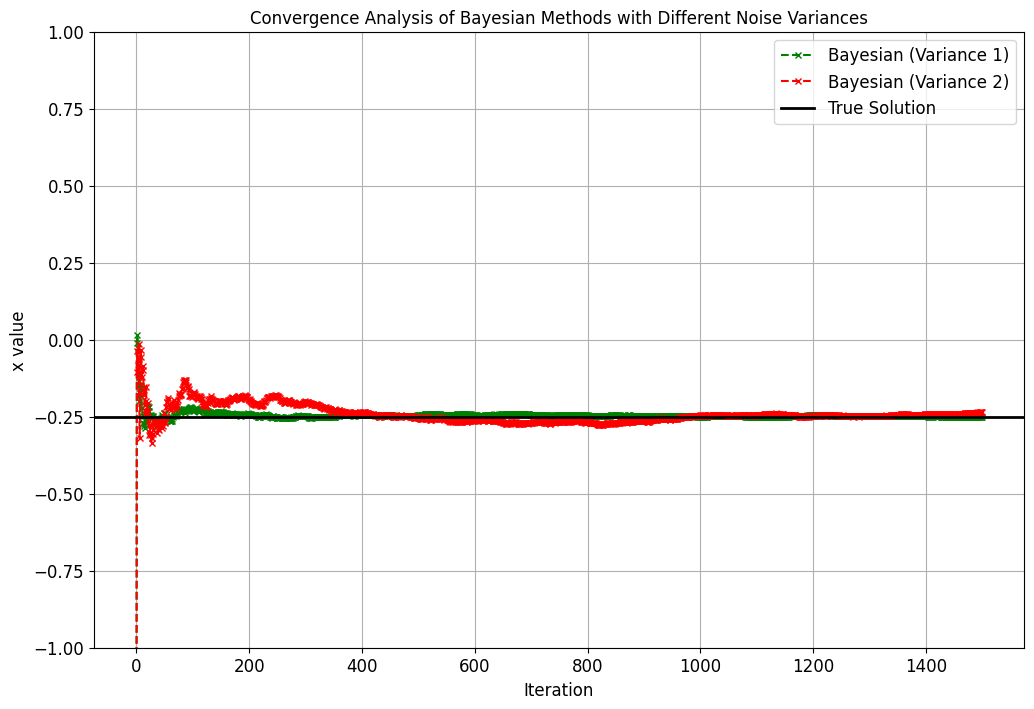

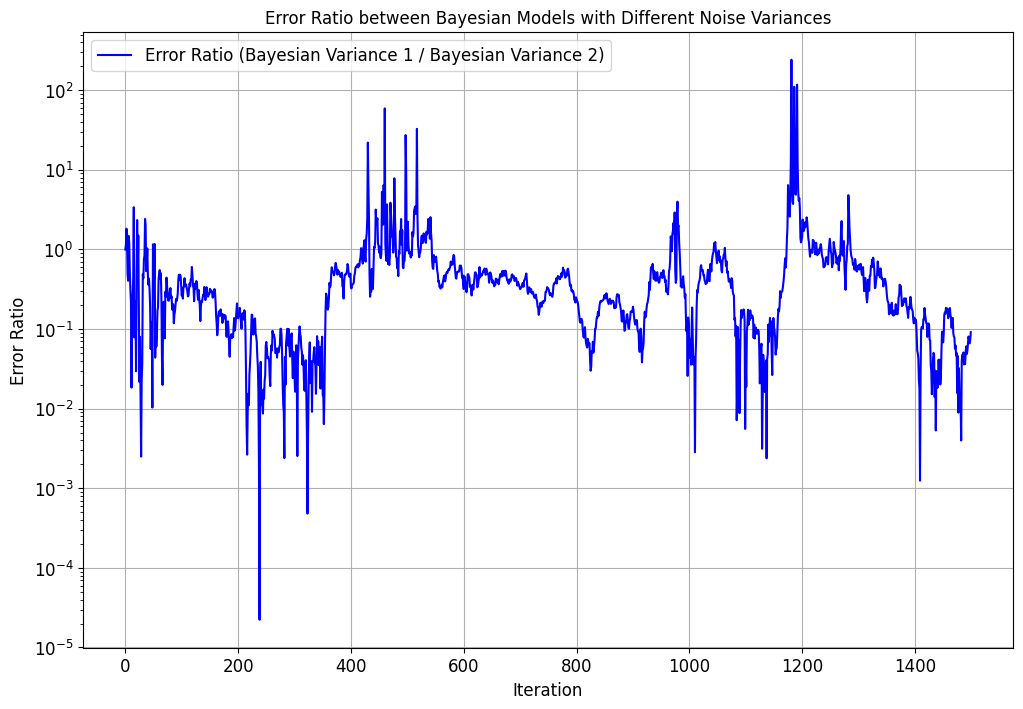

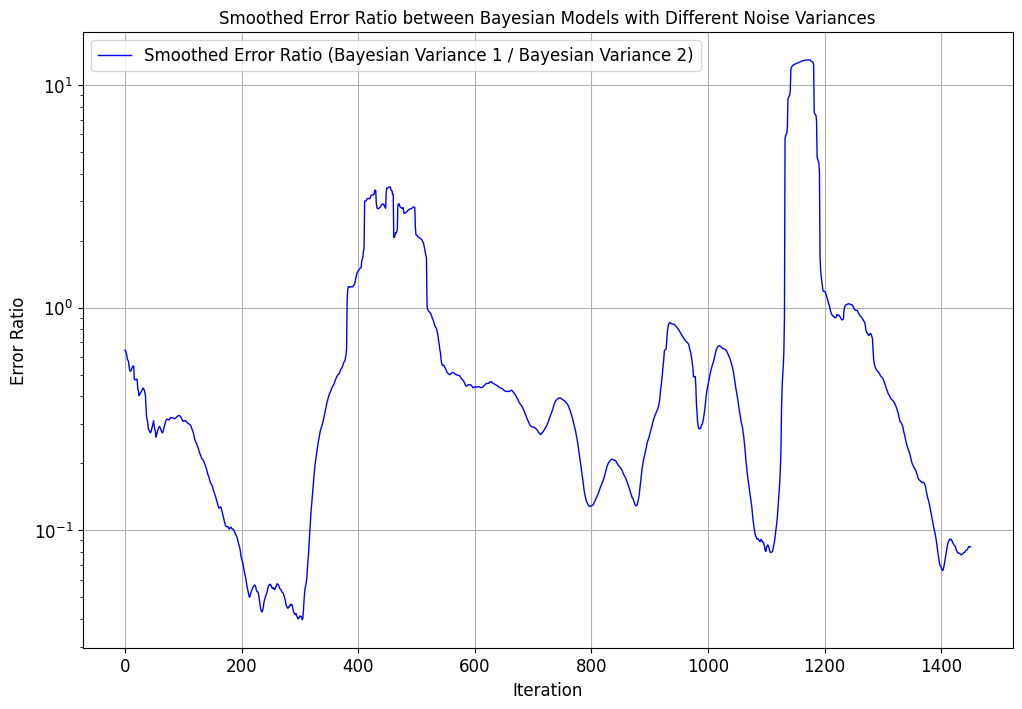

Final estimate from Bayesian method (Variance 1): -0.2512756916803913
Final estimate from Bayesian method (Variance 2): -0.23603771830003417


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition for both methods
def f(x):
    return 1 + 4 * x

# Robbins-Monro implementation
def robbins_monro(initial_guess, steps, a_n):
    x = initial_guess
    x_values = [x]
    for n in range(steps):
        noise = np.random.normal(0, 2)
        x = x - a_n(n) * (f(x) + noise)
        x_values.append(x)
    return x_values

def step_size(n):
    return 1 / (1 + n)**0.6

# Bayesian method functions
def define_prior(mu_array, sigma_matrix):
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1  # Variance, not standard deviation
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, x):
    y_alpha_cov = np.dot(alpha_sigma, x)
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon):
    return np.dot(alpha, x) + epsilon

def F(x):
    return np.array([x, 1])  # Feature vector for linear function

def g(x, alpha):
    return np.dot(F(x), alpha)

def find_zero_crossing(func, alpha, x_range=(-10, 10), tol=1e-5, max_iterations=100):
    x = np.random.uniform(x_range[0], x_range[1])  # Initial guess
    for _ in range(max_iterations):
        fx = g(x, alpha)
        fpx = alpha[0]  # Derivative of g(x, alpha) for linear function
        if abs(fx) < tol:
            return x
        if fpx == 0:
            x = np.random.uniform(x_range[0], x_range[1])  # Avoid division by zero
        else:
            x = x - fx / fpx
    return None

def moving_average(data, window_size):
    """ Calculate the moving average over a specific window size """
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')    

# Main function to perform convergence analysis
def main():
    fontsize = 12  # Set the font size
    true_alpha = np.array([4, 1])
    prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))  # Identity matrix for initial prior
    num_iterations = 1500  # For both methods
    x_range = (-10, 10)

    # Bayesian method with noise variance 1
    x_values_bayesian_1 = []
    x = 0.5
    for i in range(num_iterations):
        x_vector = F(x)
        epsilon = np.random.normal(0, 1)  # Noise variance 1
        y = simulate_y(true_alpha, x_vector, epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, x_vector)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

        x_zero = find_zero_crossing(g, updated_alpha_mu)
        if x_zero is not None:
            x = x_zero
        x_values_bayesian_1.append(x)

    # Bayesian method with noise variance 2
    prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))  # Reset prior
    x_values_bayesian_2 = []
    x =0.5
    for i in range(num_iterations):
        x_vector = F(x)
        epsilon = np.random.normal(0, 2)  # Noise variance 2
        y = simulate_y(true_alpha, x_vector, epsilon)

        y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
        updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, x_vector)

        prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

        x_zero = find_zero_crossing(g, updated_alpha_mu)
        if x_zero is not None:
            x = x_zero
        x_values_bayesian_2.append(x)

    # True solution for comparison
    true_solution = -0.25  # Based on the function definition 1 + 4x = 0 => x = -0.25

    # Plotting convergence
    plt.figure(figsize=(12, 8))

    plt.plot(x_values_bayesian_1, label="Bayesian (Variance 1)", marker='x', linestyle='--', color='green', markersize=4)
    plt.plot(x_values_bayesian_2, label="Bayesian (Variance 2)", marker='x', linestyle='--', color='red', markersize=4)
    plt.axhline(true_solution, color='black', linestyle='-', linewidth=2, label='True Solution')

    plt.xlabel("Iteration", fontsize=fontsize)
    plt.ylabel("x value", fontsize=fontsize)
    plt.title("Convergence Analysis of Bayesian Methods with Different Noise Variances", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(True)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylim([-1, 1])  # Zooming in on the relevant region
    plt.show()

    # Ensuring both methods have the same length of iterations
    min_length = min(len(x_values_bayesian_1), len(x_values_bayesian_2))
    x_values_bayesian_1 = x_values_bayesian_1[:min_length]
    x_values_bayesian_2 = x_values_bayesian_2[:min_length]

    # Calculating the ratio of the error terms
    ratios = [abs(x - true_solution) / abs(y - true_solution) for x, y in zip(x_values_bayesian_1, x_values_bayesian_2)]

    # Plotting the ratio
    plt.figure(figsize=(12, 8))
    plt.plot(ratios, label='Error Ratio (Bayesian Variance 1 / Bayesian Variance 2)', color='blue')
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Error Ratio between Bayesian Models with Different Noise Variances', fontsize=fontsize)
    plt.yscale('log')  # Using log scale for better visualization
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Apply moving average to the error ratios
    window_size = 50
    smoothed_ratios = moving_average(ratios, window_size)

    # Plotting the smoothed error ratio
    plt.figure(figsize=(12, 8))
    plt.plot(smoothed_ratios, label='Smoothed Error Ratio (Bayesian Variance 1 / Bayesian Variance 2)', color='blue', linewidth=1)
    plt.yscale('log')    
    plt.xlabel('Iteration', fontsize=fontsize)
    plt.ylabel('Error Ratio', fontsize=fontsize)
    plt.title('Smoothed Error Ratio between Bayesian Models with Different Noise Variances', fontsize=fontsize)
    plt.grid(True)
    plt.legend(fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.show()

    # Print the final estimates from both methods
    final_estimate_bayesian_1 = x_values_bayesian_1[-1]
    final_estimate_bayesian_2 = x_values_bayesian_2[-1]
    print(f"Final estimate from Bayesian method (Variance 1): {final_estimate_bayesian_1}")
    print(f"Final estimate from Bayesian method (Variance 2): {final_estimate_bayesian_2}")

if __name__ == "__main__":
    main()


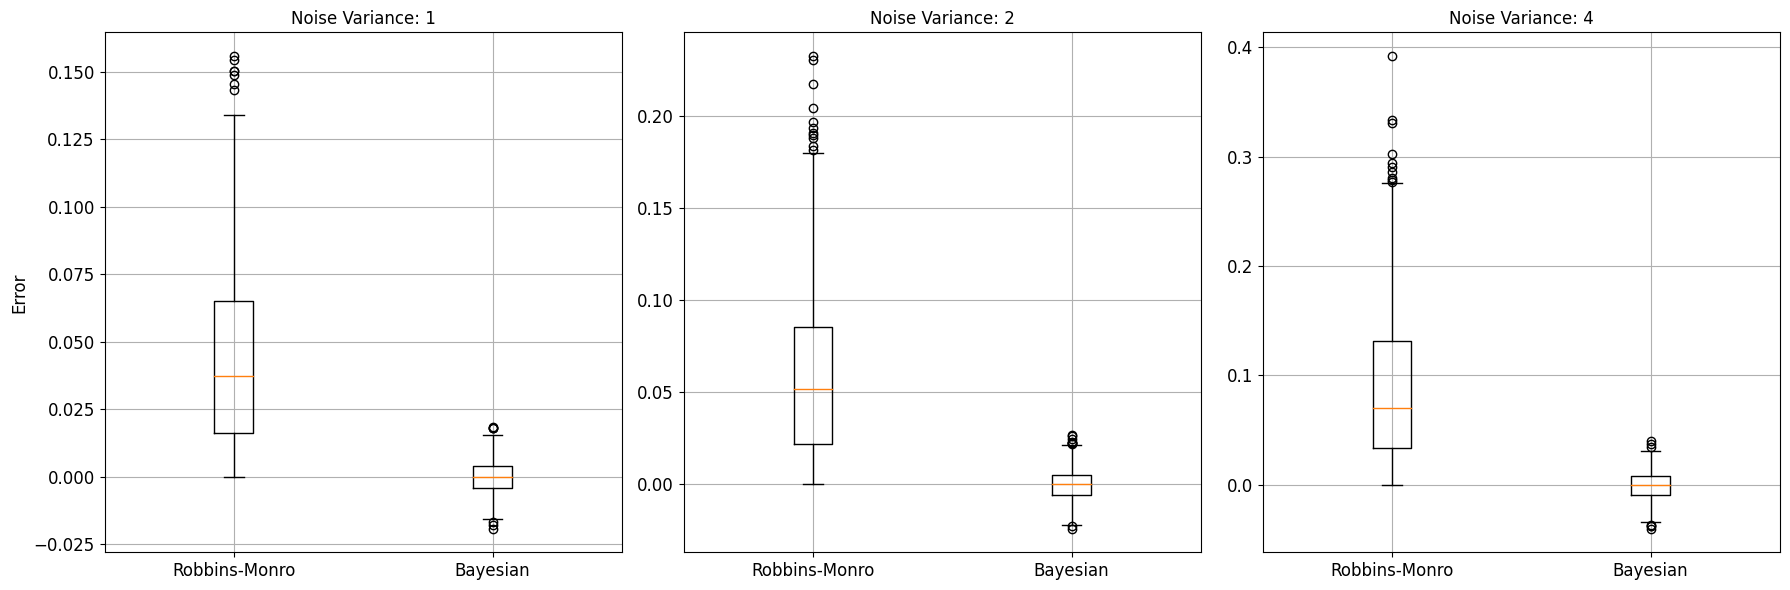

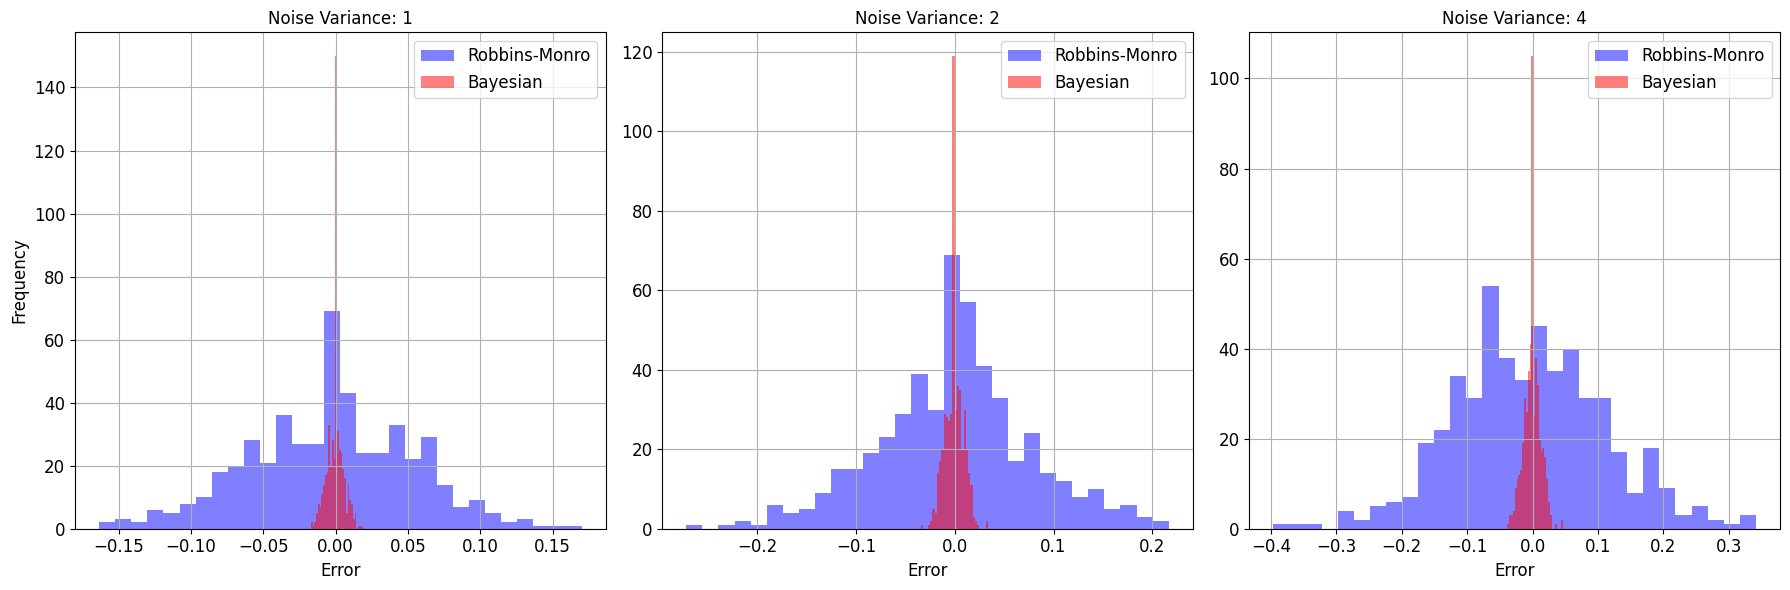

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Function definition for the linear model
def f(x):
    return 1 + 4 * x

# Robbins-Monro implementation
def robbins_monro(initial_guess, steps, a_n, noise_variance):
    x = initial_guess
    for n in range(steps):
        noise = np.random.normal(0, noise_variance**0.5)  # Adjusted for different noise variances
        x = x - a_n(n) * (f(x) + noise)
        if abs(f(x)) < 1e-5:
            break
    return x, n

# Step size calculation for Robbins-Monro
def step_size(n):
    return 1 / (1 + n)**0.5

# Bayesian method functions
def define_prior(mu_array, sigma_matrix):
    return np.array(mu_array), np.array(sigma_matrix)

def compute_y_parameters(alpha_mu, alpha_sigma, x):
    y_mu = np.dot(alpha_mu, x)
    y_sigma = np.dot(x.T, np.dot(alpha_sigma, x)) + 1  # Variance, not standard deviation
    return y_mu, y_sigma

def compute_posterior(alpha_mu, alpha_sigma, y, y_mu, y_sigma, y_alpha_cov):
    product = y_alpha_cov / y_sigma
    updated_mu = alpha_mu + product * (y - y_mu)
    updated_sigma = alpha_sigma - np.outer(product, y_alpha_cov)
    return updated_mu, updated_sigma

def simulate_y(alpha, x, epsilon, noise_variance):
    return np.dot(alpha, x) + np.random.normal(0, noise_variance**0.5)  # Adjusted for different noise variances

def F(x):
    return np.array([x, 1])  # Feature vector for linear function

def g(x, alpha):
    return np.dot(F(x), alpha)

def find_zero_crossing(func, alpha, tol=1e-5, max_iterations=100):
    x = np.random.normal()  # Initial guess
    for _ in range(max_iterations):
        fx = g(x, alpha)
        fpx = alpha[0]  # Derivative of g(x, alpha) for linear function
        if abs(fx) < tol:
            return x
        if fpx == 0:
            return None  # Avoid division by zero
        x = x - fx / fpx
    return None

# Main function to perform convergence analysis
def main(num_runs, noise_variances):
    fontsize = 12  # Set the font size

    plt.figure(figsize=(18, 6))
    for idx, variance in enumerate(noise_variances, 1):
        errors_rm = []
        errors_bayesian = []

        for _ in range(num_runs):
            initial_guess = np.random.uniform(-10, 10)
            x_rm, _ = robbins_monro(initial_guess, 1500, step_size, variance)
            errors_rm.append(abs(x_rm + 0.25))  # True solution is -0.25

            prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))
            x = initial_guess
            for i in range(1500):
                x_vector = F(x)
                y = simulate_y(np.array([4, 1]), x_vector, 0, variance)  # Modified to include variance

                y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
                y_alpha_cov = np.dot(prior_sigma, x_vector)
                updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, y_alpha_cov)

                prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

                x_zero = find_zero_crossing(g, updated_alpha_mu)
                if x_zero is not None:
                    x = x_zero
                else:
                    break
                if x_zero is not None and abs(f(x_zero)) < 1e-5:
                    break

            errors_bayesian.append(x + 0.25)  # True solution is -0.25

        plt.subplot(1, 3, idx)
        plt.boxplot([errors_rm, errors_bayesian], labels=['Robbins-Monro', 'Bayesian'])
        plt.title(f"Noise Variance: {variance}", fontsize=fontsize)
        plt.ylabel("Error" if idx == 1 else "", fontsize=fontsize)
        plt.grid(True)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)

    plt.tight_layout()
    plt.show()

    # Plotting histograms
    plt.figure(figsize=(18, 6))
    for idx, variance in enumerate(noise_variances, 1):
        errors_rm = []
        errors_bayesian = []

        for _ in range(num_runs):
            initial_guess = np.random.uniform(-10, 10)
            x_rm, _ = robbins_monro(initial_guess, 1500, step_size, variance)
            errors_rm.append((-0.25 - x_rm ))  # True solution is -0.25

            prior_mu, prior_sigma = define_prior([0, 0], np.eye(2))
            x = initial_guess
            for i in range(1500):
                x_vector = F(x)
                y = simulate_y(np.array([4, 1]), x_vector, 0, variance)  # Modified to include variance

                y_mu, y_sigma = compute_y_parameters(prior_mu, prior_sigma, x_vector)
                y_alpha_cov = np.dot(prior_sigma, x_vector)
                updated_alpha_mu, updated_alpha_sigma = compute_posterior(prior_mu, prior_sigma, y, y_mu, y_sigma, y_alpha_cov)

                prior_mu, prior_sigma = updated_alpha_mu, updated_alpha_sigma

                x_zero = find_zero_crossing(g, updated_alpha_mu)
                if x_zero is not None:
                    x = x_zero
                else:
                    break
                if x_zero is not None and abs(f(x_zero)) < 1e-5:
                    break

            errors_bayesian.append( -0.25 - x)  # True solution is -0.25

        plt.subplot(1, 3, idx)
        plt.hist(errors_rm, bins=30, alpha=0.5, label='Robbins-Monro', color='blue')
        plt.hist(errors_bayesian, bins=30, alpha=0.5, label='Bayesian', color='red')
        plt.title(f"Noise Variance: {variance}", fontsize=fontsize)
        if idx == 1:
            plt.ylabel("Frequency", fontsize=fontsize)
        plt.xlabel("Error", fontsize=fontsize)
        plt.legend(fontsize=fontsize)
        plt.grid(True)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main(500, [1, 2, 4])
